## Chapter 4
# Sinusoids and Exponentials

### Sinusoids at the Same Frequency

An important property of sinusoids at a particular frequency is that they are _closed_ with respect to addition. In other words, if you take a sinusoid, make many copies of it, scale them all by different gains, delay them all by different time intervals, and add them up, you always get a sinusoid at the same original frequency.

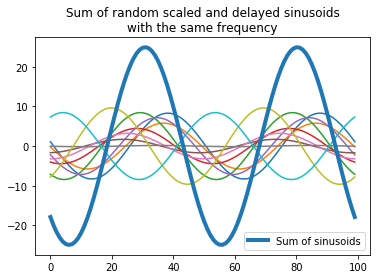

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_sinusoids = 10
amplitudes = np.random.rand(num_sinusoids) * 10
phase_offsets = np.random.rand(num_sinusoids) * 2 * np.pi

sinusoids = np.array([amplitudes[i] * np.sin(np.linspace(-2 * np.pi, 2 * np.pi, 100) + phase_offsets[i]) for i in range(num_sinusoids)])
sum_of_sinusoids = np.sum(sinusoids, axis=0)

plt.title('Sum of random scaled and delayed sinusoids\nwith the same frequency')
plt.plot(sinusoids.T)
plt.plot(sum_of_sinusoids, linewidth=4, label='Sum of sinusoids')
_ = plt.legend(loc='lower right')

## Exponentials

The canonical form of an exponential function is

$a(t) = Ae^{-t/\tau}, t \geq 0$,

where $\tau$ is called the _time constant_ of the exponential. $A$ is the peak amplitude. The time constant is the time it takes to decay by $1/e$, i.e.

$\frac{a(\tau)}{a(0)} = \frac{1}{e}$.

$t_{60}$ is defined as the _time to decay by 60 dB_.

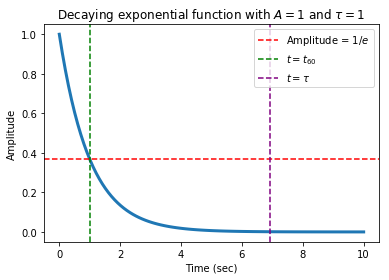

In [2]:
plt.title('Decaying exponential function with $A = 1$ and $\\tau = 1$')
ts = np.linspace(0, 10, 100)
plt.plot(ts, np.exp(-ts), linewidth=3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.axhline(y=1/np.e, c='r', label='Amplitude = $1/e$', linestyle='--')
plt.axvline(x=1, c='g', label='$t=t_{60}$', linestyle='--')
plt.axvline(x=np.log(1000), c='purple', label='$t=\\tau$', linestyle='--')
_ = plt.legend()

### Sinusoidal Amplitude / Frequency Modulation

For a brief exploration of the spectra and sound of some amplitude/frequency/ring modulations, see the middle of my notebook for [Musimathics Vol 2 Chapter 9](http://localhost:8888/notebooks/musimathics/volume_2/chapter_9_sound_synthesis.ipynb).

### Analytic Signals and Hilbert Transforms

A signal which has no negative-frequency components is called an _analytic signal_.

A filter can be constructed which shifts each sinusoidal component by a quarter cycle and adds the resulting _phase-quadrature_ component to the original (real) signal to produce the analytic signal.

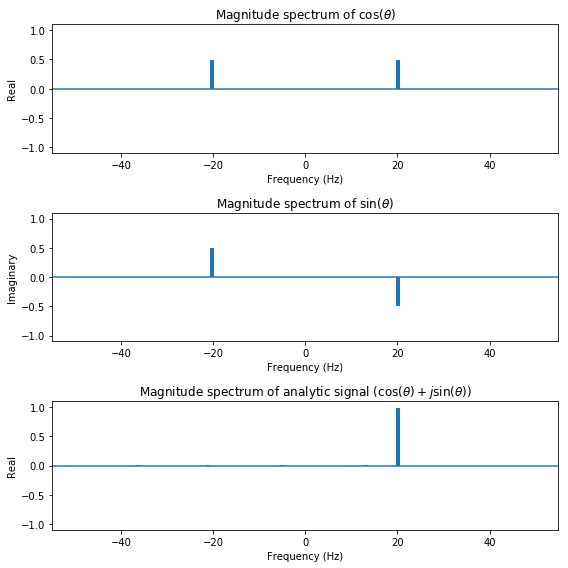

In [3]:
f = 20
plt.figure(figsize=(8, 8))
N = 100
x = np.cos(np.linspace(0, 2 * np.pi, N)[:-1] * f)
freq = np.fft.fftfreq(len(x), 1/N)
plt.subplot(311)
plt.title('Magnitude spectrum of $\\cos(\\theta)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Real')
plt.bar(freq, np.fft.fft(x).real / N)
plt.axhline()
plt.ylim(-1.1, 1.1)
plt.subplot(312)
y = np.sin(np.linspace(0, 2 * np.pi, N)[:-1] * f)
plt.title('Magnitude spectrum of $\\sin(\\theta)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Imaginary')
plt.bar(freq, np.fft.fft(y).imag / N)
plt.axhline()
plt.ylim(-1.1, 1.1)
plt.subplot(313)
z = x + 1j * y
plt.title('Magnitude spectrum of analytic signal ($\\cos(\\theta) + j\\sin(\\theta)$)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Real')
plt.bar(freq, np.fft.fft(z).real / N)
plt.axhline()
plt.ylim(-1.1, 1.1)
plt.tight_layout()

### Sampled generalized complex sinusoids represented by points in the z-plane

The generalized complex sinusoid can be expressed as

$e^{(\sigma + j\omega)T}$,

where $\sigma = -1/\tau$, $\tau$ is the time constant for the exponential envelope (described above), $\omega = 2\pi f$, and $T$ is the sampling interval.

The following animation is based off of [Fig 4.19](https://www.dsprelated.com/freebooks/mdft/Comparing_Analog_Digital_Complex.html) in the book,
![](http://www.dsprelated.com/josimages_new/mdft/img652.png) showing the generalized complex sinusoid. Here the angle corresponds to the frequency and the distance from the origin corresponds to the decay factor $\sigma$.

In [217]:
def generalized_complex_sinusoid(x, frequency_hz, decay=1):
    return np.exp((decay + 1j * 2 * np.pi * frequency_hz) * x)

In [316]:
import sys
sys.path.append('../')

from ipython_animation import create_animation, DEFAULT_FPS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

fs = 44100
x = np.linspace(0, 1, fs)
frequency_hz = 10
x_range = np.arange(len(x))

fig = plt.figure(figsize=(8, 16))
z_plane_ax = fig.add_subplot(2, 1, 1)
z_plane_point = z_plane_ax.scatter([0], [0], s=75)
z_plane_ax.set_xlim(-2, 2)
z_plane_ax.set_ylim(-2, 2)
z_plane_ax.set_title('Exploring the $z$-plane', y = 1.05, size=14)
z_plane_ax.grid(True)
unit_circle_angles = np.linspace(0, 2 * np.pi, 1000)
z_plane_ax.plot(np.cos(unit_circle_angles), np.sin(unit_circle_angles), label='Unit circle', c='red')
z_plane_ax.legend()

ax = fig.add_subplot(2, 1, 2, projection='3d')
line, = ax.plot(x_range, np.zeros(len(x)), np.zeros(len(x)), linewidth=4)
ax.set_xlabel('Time $\\rightarrow$')
ax.set_ylabel('Imaginary')
ax.set_zlabel('Real')
ax.set_xlim(0, len(x))
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_xticklabels([]); ax.set_yticklabels([]); ax.set_zticklabels([])

x_scale=3; y_scale=1; z_scale=1;
scale=np.diag([x_scale, y_scale, z_scale, 1])
scale = scale / scale.max()
scale[3,3] = 0.8 # makes the whole thing larger, apparently ;)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), scale)

animation_length_seconds = 8
num_frames = DEFAULT_FPS * animation_length_seconds

decay_range = (-1, 1)
def animate(i):
    percent_complete = i / num_frames
    if percent_complete < 0.25:
        angle = 0
        r = percent_complete / 0.25
    elif percent_complete < 0.5:
        angle = 4 * np.pi * (percent_complete - 0.25)
        r = 1
    elif percent_complete < 0.75:
        angle = (4 * np.pi / 4) + (percent_complete - 0.5) * 3 * np.pi
        r = 1 + (percent_complete - 0.5) * 4
    else:
        angle = 1.75 * np.pi + (percent_complete - 0.75) * np.pi
        r = 2 - 8 * (percent_complete - 0.75)
    decay = decay_range[0] + (decay_range[1] - decay_range[0]) * r / 2
    frequency = angle if angle < np.pi else 2 * np.pi - angle # alias at Nyquist frequency
    z_plane_point.set_offsets([r * np.cos(angle), r * np.sin(angle)])
    sinusoid = generalized_complex_sinusoid(x, frequency, decay)
    line.set_xdata(x_range)
    line.set_ydata(sinusoid.imag)
    line.set_3d_properties(sinusoid.real)


plt.tight_layout()
create_animation(fig, plt, animate, length_seconds=animation_length_seconds)

## Sinusoid Problems

**1. Figure 4.20 (in book) shows a plot of a sinusoid. From the plot, determine values for the amplitude $A$, phase $\phi$ and frequency $\omega_0$ needed in the representation:**

$x(t) = A\cos(\omega_0 t+ \phi)$

**Give the answer as numerical values, including the units when applicable.**

$A$ = 20

$\omega_0$: I'd call it roughly $2\pi * f = (1 / (0.03 / 2 s)) = 2\pi * (1 / (0.015 s)) \approx 2\pi * 66\space\text{radians/sec}$.

$\phi \approx 3\pi/8$

**2. Given**

$x(t) = 4\sqrt{2}\sin(\omega_0 t + 45^{\circ}) + 3\cos(\omega_0 t)$,

**a) Express $x(t)$ in the form $x(t) = A\cos(\omega_0 t + \phi)$, where $\phi$ is in radians.**

Using the identity $a\cos(\omega t + \alpha) + b\cos(\omega t) = \sqrt{a ^ 2 + b ^ 2 + 2ab\cos(\alpha)}\cos(\omega t + \tan^{-1}\left[\frac{a\sin(\alpha)}{a\cos(\alpha) + b}\right])$,

$\begin{align}
x(t) &= 4\sqrt{2}\sin(\omega_0 t + 45^{\circ}) + 3\cos(\omega_0 t)\\
&= 4\sqrt{2}\cos(\omega_0 t - \frac{\pi}{4}) + 3\cos(\omega_0 t)\\
&= \sqrt{(4\sqrt{2}) ^ 2 + 3 ^ 2 + 2 * 4\sqrt{2} * 3 * \cos(-\frac{\pi}{4})}\cos(\omega t + \tan^{-1}\left[\frac{4\sqrt{2}\sin(-\frac{\pi}{4})}{4\sqrt{2}\cos(-\frac{\pi}{4}) + 3}\right])\\
&= \sqrt{65}\cos(\omega t + \tan^{-1}(-4/7))
\end{align}$,


**b) Assume that $\omega_0 = 10\pi$. Make a plot of $x(t)$ over the range $-1 \leq t \leq 1$. How many periods are included in the plot?**

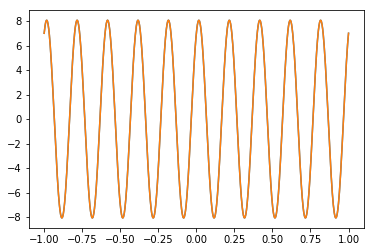

In [268]:
# Verify the simplification is correct (lots of room for mistakes!)
t = np.linspace(-1, 1, 1000)
omega = 10 * np.pi
x = 4 * np.sqrt(2) * np.sin(omega * t + np.pi / 4) + 3 * np.cos(omega * t)
x_simplified = np.sqrt(65) * np.cos(omega * t + np.arctan2(-4, 7))
_ = plt.plot(t, x)
_ = plt.plot(t, x_simplified)

There are 10 periods included in the plot.

**Find a complex valued signal $\tilde{x}$ such that $x(t) = \text{re}\{\tilde{x}(t)\}$.**

$\tilde{x} = \sqrt{65}e^{j(\omega t + \tan^{-1}(-4/7))}$

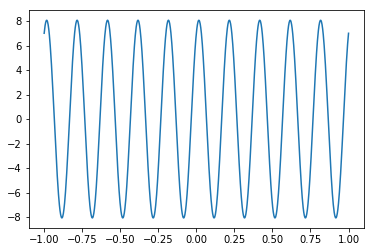

In [291]:
_ = plt.plot(t, np.sqrt(65) * (np.exp(1j * (omega * t + np.arctan2(-4, 7)))).real)

**3. Find the amplitude and phase of the following sinusoids**

**a) $\cos(\omega t) + \sin(\omega t)$**

$\begin{align}
\cos(\omega t) + \sin(\omega t) &= \cos(\omega t) + \cos(\omega t - \frac{\pi}{2})\\
&= \cos(-\frac{\pi}{4})\cos(\omega t - \frac{\pi}{4})\\
&= \frac{\sqrt{2}}{2}\cos(\omega t - \frac{\pi}{4})
\end{align}$

**b) $\sin(\omega t) + \sqrt{3}\cos(\omega t)$**

$\begin{align}
\sin(\omega t) + \sqrt{3}\cos(\omega t) &= \cos(\omega t - \frac{\pi}{2}) + \sqrt{3}\cos(\omega t)\\
&= \sqrt{\sqrt{3}^2 + 2\sqrt{3}\cos(-\frac{\pi}{2})}\cos\{\omega t + \tan^{-1}\left[\frac{\sin(- \frac{\pi}{2})}{\cos(- \frac{\pi}{2}) + \sqrt{3}}\right]\}\\
&= \sqrt{3}\cos(\omega t + \tan^{-1}-\frac{1}{\sqrt{3}})\\
&= \sqrt{3}\cos(\omega t - \frac{\pi}{6})
\end{align}$

**4) Define the discrete-time generalized sinusoid**

$x[n] = Xz_0^n$, $n = 0, 1, 2, ...$,

where

$X = 2e^{j\pi/4}\\
z_0 = 0.9e^{j\pi/8}$.

**a) What is the amplitude of this sinusoid? What is the phase in radians? What is the phase in cycles? What is the phase in degrees?**

First, let's put this in a generalized complex sinusoid form:

$\begin{align}
x[n] &= 2e^{j\pi/4}(0.9e^{j\pi/8})^n\\
&= 2 \cdot0.9^ne^{j(\frac{\pi}{4})}e^{j(n\frac{\pi}{8})}\\
&= 2e^{n\ln(0.9)}e^{j( n\frac{\pi}{8} + \frac{\pi}{4})}
\end{align}$

The amplitude of the phasor is $A = \left|X\right| = 2$.

The phase is $\angle{X} = \frac{\pi}{4} \text{radians} = \frac{1}{8} \text{cycles} = 45^{\circ}$.

**b) Plot $\text{re}\{Xz_0^n\}$ and $\text{im}\{Xz_0^n\}$ versus $n$.**

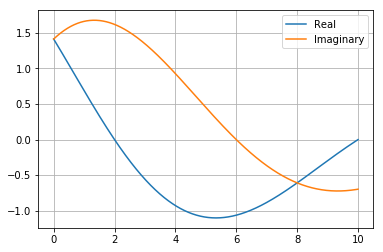

In [324]:
n = np.linspace(0, 10, 1000)
x = 2 * np.exp(1j * np.pi / 4) * (0.9 * np.exp(1j * np.pi / 8)) ** n

plt.plot(n, x.real, label='Real')
plt.plot(n, x.imag, label='Imaginary')
plt.grid(True)
_ = plt.legend()

**c) Plot $Xz_0^n$ as a collection of points in the complex plan (imaginary part versus real part)**

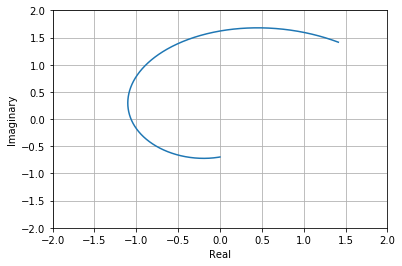

In [326]:
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis([-2, 2, -2, 2])
plt.grid(True)
_ = plt.plot(x.real, x.imag)

**d) What is the time constant $\tau$ of decay (in samples)?**

$\tau = -1/\sigma = -1/\ln(0.9) \approx  9.49 $ samples

**e) What is the 60 dB decay time $T_{60}$ in time constants?**

$T_{60} = \ln(1000)\tau \approx 6.91\tau \approx 65.58$

**f) What is $T_{60}$ in samples?**

If I'm not mistaken, it's the same as the number of time constants, since we haven't been given a sample period, so we must assume $T = 1$. I'm probably missing something :/

**g) What is the 80 dB decay time $T_{80}$ in time constants?**

TODO ...